In [52]:
import os 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# print(f'pandas version: {pd.__version__}')
# print(f'numpy version: {np.__version__}')
# print(f'json version: {json.__version__}')

In [53]:
base_path = "./UserData/"

results = {}
amount_of_files = 0

# Loop over all the files
for dir in os.listdir(base_path):
    dir_path = base_path + dir

    # Only check the directories
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = dir_path + "/" + file

            # Only check the files
            if not os.path.isdir(file_path):
                amount_of_files += 1
                log_path = dir_path + "/logs"
                
                # Get the excel file and convert to an array with 0, 0.5 and 1
                # representing neutral, slight smile and smile
                df = pd.read_excel(file_path)
                result_array = np.where(df.iloc[3:, 1:4] == 'x')[1] / 2
                for log in os.listdir(log_path):
                    # Get the corresponding log file and convert to an array
                    # with numbers representing the smile degree
                    if file[2:-5] in log:
                        with open(log_path + "/" + log, "r") as log_file:
                            json_log = json.load(log_file)
                            smile_degree_array = [entry['smileDegree'] for entry in json_log]
                results[file[:-5]] = [result_array, smile_degree_array]
                
print(f"Amount of files: {amount_of_files}")

Amount of files: 32


### General MSE comparison

In [54]:
MSE = 0
MSE_A = 0
MSE_B = 0
length = 0
length_A = 0
length_B = 0

for key, values in results.items():
    min_len = min(len(values[0]), len(values[1]))
    MSE += sum(values[0][:min_len] - values[1][:min_len])
    length += min_len
    if key[-1] == "A":
        MSE_A += sum(values[0][:min_len] - values[1][:min_len])
        length_A += min_len
    elif key[-1] == "B":
        MSE_B += sum(values[0][:min_len] - values[1][:min_len])
        length_B += min_len
        
MSE_A /= length_A
MSE_B /= length_B
MSE /= length

print(f"Total MSE \t = {MSE}")
print(f"MSE A \t\t = {MSE_A}")
print(f"MSE B \t\t = {MSE_B}")

Total MSE 	 = -0.13205479156940012
MSE A 		 = -0.13099312341198133
MSE B 		 = -0.133265373577282


### Average happiness

In [55]:
happiness = 0
happiness_A = 0
happiness_B = 0
happiness_recomm = 0
happiness_recomm_A = 0
happiness_recomm_B = 0
length = 0
length_A = 0
length_B = 0

for key, values in results.items():
    if int(key.split("_")[0]) < 9:  # Lena
    # if int(key.split("_")[0]:) >= 9 and int(key.split("_")[0]) < 17:  # Jens
    # if True:  # Default
        min_len = min(len(values[0]), len(values[1]))
        happiness += sum(values[0][:min_len])
        happiness_recomm += sum(values[1][:min_len])
        length += min_len
        if key[-1] == "A":
            happiness_A += sum(values[0][:min_len])
            happiness_recomm_A += sum(values[1][:min_len])
            length_A += min_len
        elif key[-1] == "B":
            happiness_B += sum(values[0][:min_len])
            happiness_recomm_B += sum(values[1][:min_len])
            length_B += min_len
        
happiness /= length
happiness_A /= length_A
happiness_B /= length_B
happiness_recomm /= length
happiness_recomm_A /= length_A
happiness_recomm_B /= length_B

print(f"Total happiness \t\t\t = {happiness}")
print(f"Total happiness with recommender \t = {happiness_recomm}")
print(f"Total happiness A \t\t\t = {happiness_A}")
print(f"Total happiness A with recommender \t = {happiness_recomm_A}")
print(f"Total happiness B \t\t\t = {happiness_B}")
print(f"Total happiness B with recommender \t = {happiness_recomm_B}")

Total happiness 			 = 0.4902676399026764
Total happiness with recommender 	 = 0.6491721614005638
Total happiness A 			 = 0.4847161572052402
Total happiness A with recommender 	 = 0.6505553012928176
Total happiness B 			 = 0.49725274725274726
Total happiness B with recommender 	 = 0.6474318370306404


### Happiness over time for recommender system

In [56]:
happiness_first_part = 0
happiness_second_part = 0
length_A = 0

for key, values in results.items():
    if key[-1] == "A":
        min_len = min(len(values[0]), len(values[1]))
        length_A += min_len
        happiness_first_part += sum(values[1][:min_len//2])
        happiness_second_part += sum(values[1][min_len//2:min_len])

happiness_first_part /= length_A
happiness_second_part /= length_A

print(f"Happiness first part \t = {happiness_first_part}")
print(f"Happiness second part \t = {happiness_second_part}")

Happiness first part 	 = 0.2347856359841381
Happiness second part 	 = 0.17478925298500678


### Mann-Whitney

In [57]:
base_path = "./UserData/"
amount_of_files = 0

first = True

# Loop over all the files
for dir in os.listdir(base_path):
    dir_path = base_path + dir
    # dir_path = base_path + "\\" + dir

    # Only check the directories
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = dir_path + "/" + file
            # file_path = dir_path + "\\" + file

            # Only check the files
            if not os.path.isdir(file_path):
                amount_of_files += 1
                log_path = dir_path + "/logs"
                # log_path = dir_path + "\\logs"
                
                # Get the excel file and convert to an array with 0, 0.5 and 1
                # representing neutral, slight smile and smile
                df = pd.read_excel(file_path)
                # print(df.head())
                int_result_own = np.where(df.iloc[3:, 1:4] == 'x')[1] / 2

                for log in os.listdir(log_path):
                    # Get the corresponding log file and convert to an array
                    # with numbers representing the smile degree
                    if file[2:-5] in log:
                        with open(log_path + "/" + log, "r") as log_file:
                            json_log = json.load(log_file)
                            int_result_robot = np.array([entry['smileDegree'] for entry in json_log])
                array_length = min(len(int_result_own), len(int_result_robot))
                if first:
                    result_own = int_result_own[:array_length]
                    result_robot = int_result_robot[:array_length]
                    first = False
                else:
                    result_own = np.concatenate((result_own, int_result_own[:array_length]))
                    result_robot = np.concatenate((result_robot, int_result_robot[:array_length]))

assert(len(result_own) == len(result_robot))

In [58]:
df = pd.DataFrame({"own": result_own, "robot": result_robot})
df.agg(["count", "min", "max", "median", "mean", "skew"])

,own,robot
count,1297.000000,1297.000000
min,0.000000,0.000003
max,1.000000,1.000000
median,0.000000,0.168118
mean,0.272167,0.404221
skew,0.985097,0.440517


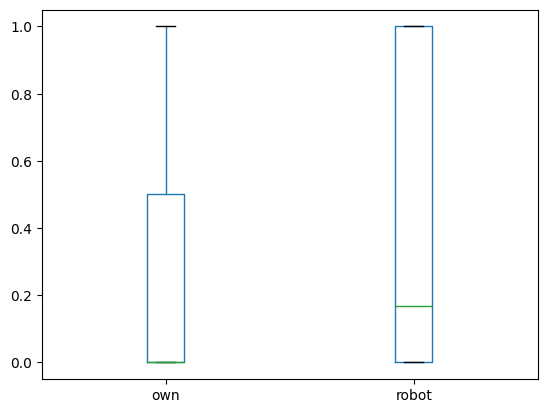

In [59]:
df.boxplot(column=['own', 'robot'], grid=False)
plt.show()